In [1]:
import numpy as np
from numpy import linspace
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [2]:
h = 0.01
steps = 5/h + 1
xSpace = np.linspace(0, 5, int(steps))
y1, y2 = [0.5], [0.5]
y11 , y22 = y1, y2
# Рунге-Кутта
# ydev = y, y(0) = 0, x = [0,5]
yder = lambda y: y
k1 = lambda y: yder(y)
k2 = lambda y: yder(y + k1(y)*h/2)
k3 = lambda y: yder(y + k2(y)*h/2)
k4 = lambda y: yder(y + k3(y)*h)
bashfort = lambda y, iter: y[iter] + h/720*(1901*yder(y[iter]) - 2774*yder(y[iter-1]) + 2616*yder(y[iter-2]) - 1274*yder(y[iter-3]) + 251*yder(y[iter-4])) 
molton = lambda y, iter: y[iter] + h/720*(251*yder(bashfort(y, iter)) + 646*yder(y[iter]) - 264*yder(y[iter-1]) + 106*yder(y[iter-2]) - 19*yder(y[iter-3]))
for i in range(1, int(steps)):
  y1.append(y1[i-1]+(k1(y1[i-1])+2*k2(y1[i-1])+2*k3(y1[i-1])+k4(y1[i-1]))*h/6)
y11 = y1
for i in range(5, int(steps)):
  y11[i] = molton(y11, i-1)
# yder = -y, y(0) = 1, x = [0,5]
yder = lambda y: -y**2
for i in range(1, int(steps)):
  y2.append(y2[i-1]+(k1(y2[i-1])+2*k2(y2[i-1])+2*k3(y2[i-1])+k4(y2[i-1]))*h/6)
y22 = y2
for i in range(5, int(steps)):
  y22[i] = molton(y22, i-1)
sol1 = odeint(lambda y, t: y, [0.5,0], xSpace)[:,0]
sol2 = odeint(lambda y, t: -y**2, [0.5,0], xSpace)[:,0]
#print(len(sol2[:,0]), len(y2))
absdif1, reldif1, absdif2, reldif2 = [], [], [], []
for i in range(int(steps)):
  absdif1.append(abs(sol1[i] - y11[i]))
  reldif1.append(absdif1[i]/sol1[i])
  absdif2.append(abs(sol2[i] - y22[i]))
  reldif2.append(absdif2[i]/sol2[i])

C:\Users\79511\AppData\Local\Temp\ipykernel_3708\1137017485.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


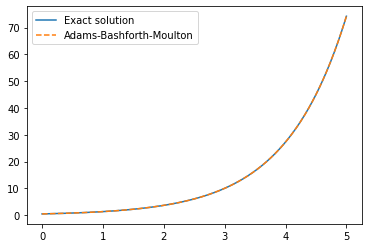

In [3]:
fig, ax = plt.subplots()
ax.plot(xSpace, sol1, '-', label='Exact solution')
ax.plot(xSpace, y11, '--', label='Adams-Bashforth-Moulton')
leg = ax.legend()
fig.show()

C:\Users\79511\AppData\Local\Temp\ipykernel_3708\1189775733.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


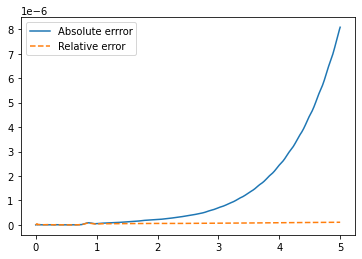

In [4]:
fig, ax = plt.subplots()
ax.plot(xSpace, absdif1, '-', label='Absolute errror')
ax.plot(xSpace, reldif1, '--', label='Relative error')
leg = ax.legend()
fig.show()

C:\Users\79511\AppData\Local\Temp\ipykernel_3708\3035968784.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


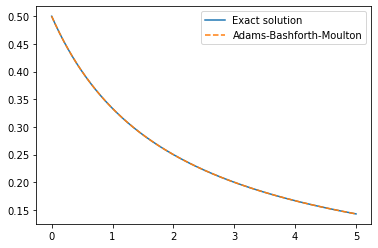

In [5]:
fig, ax = plt.subplots()
ax.plot(xSpace, sol2, '-', label='Exact solution')
ax.plot(xSpace, y22, '--', label='Adams-Bashforth-Moulton')
leg = ax.legend()
fig.show()

C:\Users\79511\AppData\Local\Temp\ipykernel_3708\641524116.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


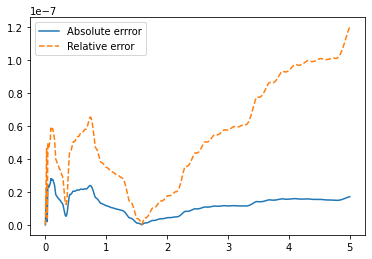

In [6]:
fig, ax = plt.subplots()
ax.plot(xSpace, absdif2, '-', label='Absolute errror')
ax.plot(xSpace, reldif2, '--', label='Relative error')
leg = ax.legend()
fig.show()